# Linear Algebra

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# たくさんの点x
X_ini = list(itertools.product([i / 10 for i in range(-10, 11)] , repeat=2))

# グラフ作成用関数
def make_graph(Y,axlim):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    Y = np.array(Y)

    # 点xを描画(散布図)
    ax.scatter(x=Y[:,0], y=Y[:,1], s=10, c='gray')
    ax.set_xlim([-axlim, axlim])
    ax.set_ylim([-axlim, axlim])

    # 基底ベクトルを描画（矢印）
    ax.annotate('',xy=Y[230], xytext=(0,0),arrowprops=dict(facecolor='b'))
    ax.annotate('',xy=Y[430], xytext=(0,0),arrowprops=dict(facecolor='g'))

    plt.show()

# 写像用関数
def mapping(A,Xs):
    Y = []
    for X in Xs:
        a = np.dot(A, np.array(X))
        Y.append(a)
    return Y

# 第1章 Matrix

ゲートを通ってみる話

##Essence: 行列はぶっ飛ばした先の住所を書いてるだけ

$x_1$くんと$x_2$ちゃんがある不思議なゲート$A$に出会いました．ゲートには行き先が書いていました．通ってみましょう

$x_1=\begin{bmatrix}1\\0\end{bmatrix}, x_2=\begin{bmatrix}0\\1\end{bmatrix}$



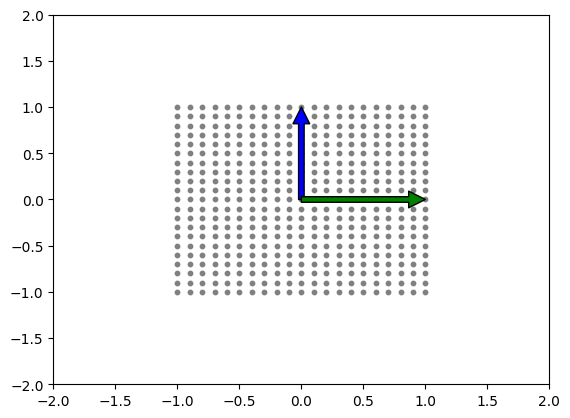

In [ ]:
#x_1,x_2の現在地.
make_graph(Y = X_ini, axlim = 2)

##Case1: Scalar


$A=\begin{bmatrix}2&0\\0&0.5\end{bmatrix}$

こんなゲートを潜ると二人はそれぞれ，$Ax_1=\begin{bmatrix}2\\0\end{bmatrix}, Ax_2=\begin{bmatrix}0\\0.5\end{bmatrix}$に移動しましたとさ





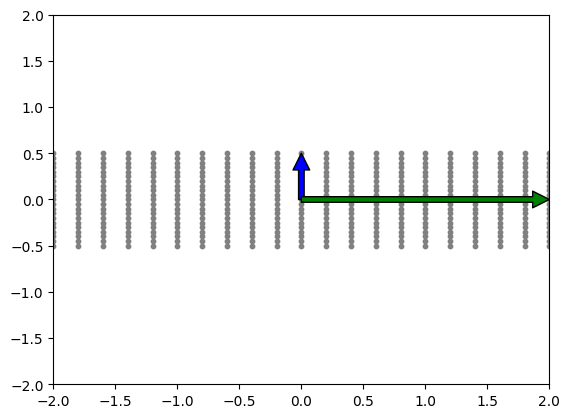

A= [[2.  0. ]
 [0.  0.5]]


In [ ]:
# 写像
A = np.array([[2,0],[0,0.5]])
Y = mapping(A,X_ini)
make_graph(Y,axlim = 2)
print("A=",A)

##Case2: Rotate


$A=\begin{bmatrix}1/\sqrt{2}&-1/\sqrt{2}\\1/\sqrt{2}&1/\sqrt{2}\end{bmatrix}$

こんなゲートを潜ると二人はそれぞれ，$Ax_1=\begin{bmatrix}1/\sqrt{2}\\1/\sqrt{2}\end{bmatrix}, Ax_2=\begin{bmatrix}-1/\sqrt{2}\\1/\sqrt{2}\end{bmatrix}$に移動しましたとさ



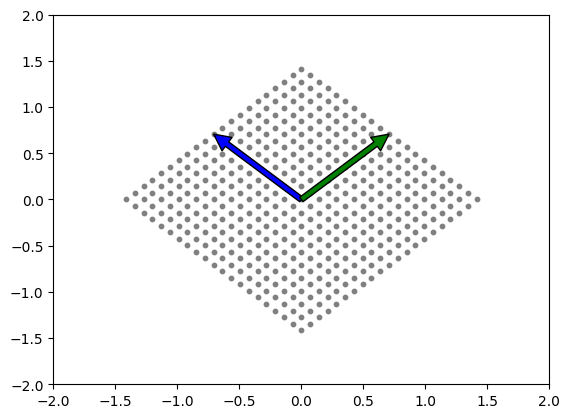

A= [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
# 写像
A = np.array([[1/(2)**0.5,-1/(2)**0.5],[1/(2)**0.5,1/(2)**0.5]])
Y = mapping(A,X_ini)
make_graph(Y,axlim = 2)
print("A=",A)

##Case3: Composite



$A=\begin{bmatrix}2&0\\0&0.5\end{bmatrix}$

というゲートを通って，


$B=\begin{bmatrix}1/\sqrt{2}&-1/\sqrt{2}\\1/\sqrt{2}&1/\sqrt{2}\end{bmatrix}$

というゲートを通る，つまり
$Aを通ったAx君たちはさらにBも通りBAx，$




こんな旅を経て二人はそれぞれ，$BAx_1=\begin{bmatrix}2/\sqrt{2}\\2/\sqrt{2}\end{bmatrix}, BAx_2=\begin{bmatrix}-0.5/\sqrt{2}\\0.5/\sqrt{2}\end{bmatrix}$に移動しましたとさ


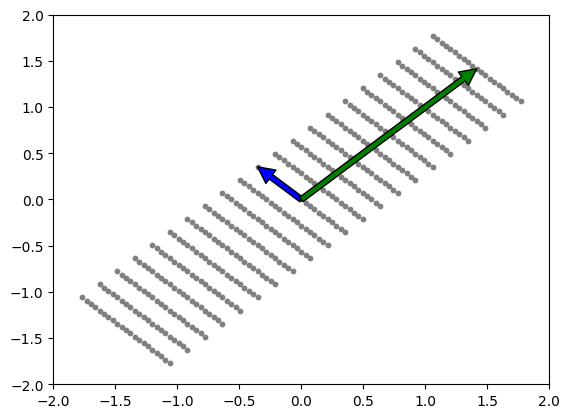

A= [[ 1.41421356 -0.35355339]
 [ 1.41421356  0.35355339]]


In [ ]:
# 写像
A = np.array([[2/(2)**0.5,-0.5/(2)**0.5],[2/(2)**0.5,0.5/(2)**0.5]])
Y = mapping(A,X_ini)
make_graph(Y,axlim = 2)
print("A=",A)

もっと複雑に，

$A=\begin{bmatrix}0&1.2\\-0.7&0\end{bmatrix}$


$B=\begin{bmatrix}1/\sqrt{2}&-1/\sqrt{2}\\1/\sqrt{2}&1/\sqrt{2}\end{bmatrix}$

$C=\begin{bmatrix}-1.3&-0.6\\0.5&1.5\end{bmatrix}$

というゲートがあって，
$y=AACBB(A+C)(B+A)CBAx$

という旅を経て二人はそれぞれ...

もうわかるだろ！！！！！！！！！**各列に対応する座標に飛ぶんだよおおお!!!!!!!**

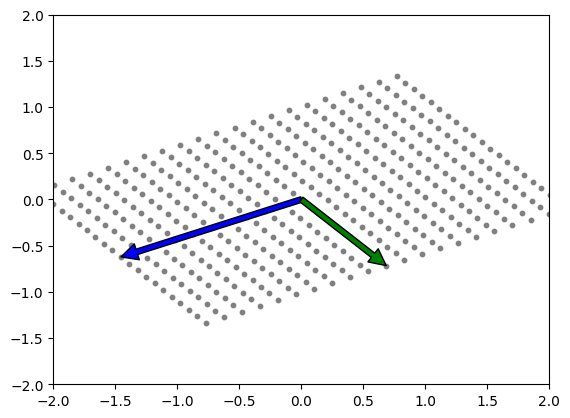

W= [[ 0.68433071 -1.45483428]
 [-0.71544865 -0.6214458 ]]


In [ ]:
# 写像

A = np.array([ [0,1.2],[-0.7,0]  ])
B = np.array([[1/(2)**0.5,-1/(2)**0.5],[1/(2)**0.5,1/(2)**0.5]])
C = np.array([ [-1.3,-0.6],[0.5,1.5]  ])
W=A@A@C@B@B@(A+C)@(B+A)@C@B@A
Y = mapping(W,X_ini)
make_graph(Y,axlim = 2)
print("W=",W)

##Case4: Inverse

ゲートを潜ってここまで来たなら，ゲート順に逆走することで元の世界に帰れるはず．

つまり元の位置に行くために通るべきゲートは，$A^{-1}B^{-1}C^{-1}(B+A)^{-1}(A+C)^{-1} B^{-1}B^{-1} C^{-1} A^{-1} A^{-1}$

(ゲートの逆順を辿るだけなのでわざわざ公式みたいに$(AB)^{-1}=B^{-1}A^{-1}$と覚える必要はない)



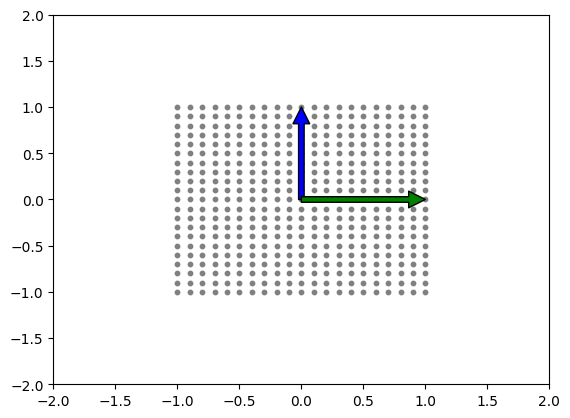

W^{-1}W= [[ 1.00000000e+00 -1.15059203e-16]
 [-7.76940448e-18  1.00000000e+00]]


In [ ]:
W_inv=np.linalg.inv(W)
Y = mapping(W_inv@W,X_ini)
make_graph(Y,axlim = 2)
print("W^{-1}W=",W_inv@W)

##Case5: Non invertible

通ってしまうともう二度と逆行できないゲートもある．それは，通ると$x_1$君と$x_2$ちゃんのどちらかしか生き残らなかったり，あるいは通ったあと二人の区別がつかなくなってしまうようなゲート

例えば

$A=\begin{bmatrix}0&-1\\0&1\end{bmatrix}$

これは$x_2$ちゃんしか生き残らん．
他には

$B=\begin{bmatrix}1&0.5\\2&1\end{bmatrix}$

これはゲートを通ることで$x_2$ちゃんと$x_1$君が同じ人物になってしまって，元の人物を特定できないためゲートを逆行できなくなる

(試しにx_1=[1,0],x_2=[0,2]で代入してみ)






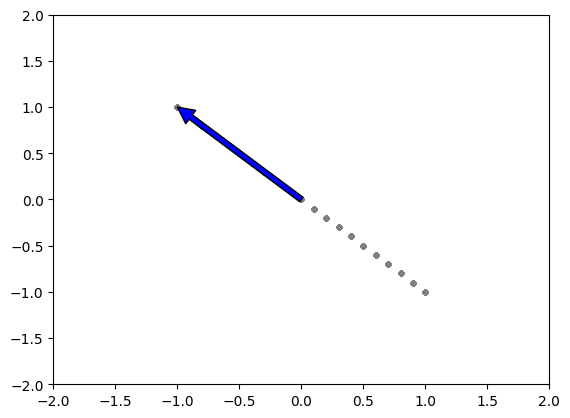

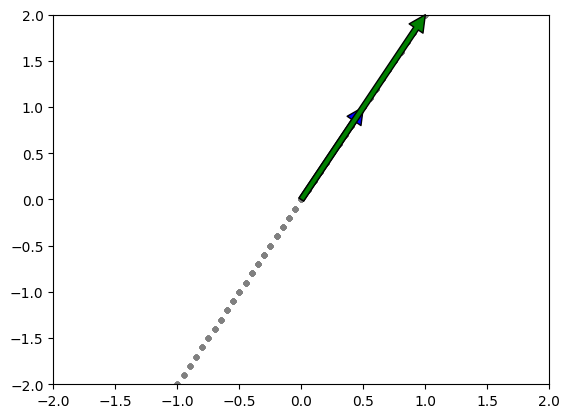

In [ ]:
A= np.array([[0,-1],[0,1]])
Y = mapping(A,X_ini)
make_graph(Y,axlim = 2)


B = np.array([[1,0.5],[2,1]])
Y = mapping(B,X_ini)
make_graph(Y,axlim = 2)

当然次のように，一人ずつ消し炭(0次元)にしていくゲートだと誰も残らない

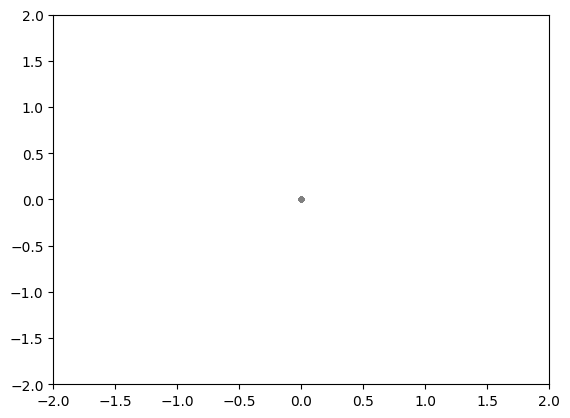

In [ ]:
A= np.array([[1,0],[0,0]])
B = np.array([[0,1],[0,0]])

Y = mapping(B@A,X_ini)
make_graph(Y,axlim = 2)

# 第2章 Basis Vector
創世記の話

##Essence: 行列は基底によって見た目が違う

$x_1$くんと$x_2$ちゃんが生まれる少し昔の話をしよう.  
かつて宇宙には何もなかった．右も左も，上も下もなかった.

そこで神がその空間に「足し算」と「実数倍」を作り出した.  

ここに，線型空間が生まれた.





その空間に最初に生まれたベクトル，アダム$e_1$とイブ$e_2$の生活の様子を見てみよう






アダムとイブの姿はわからないが，こういう条件を必ず満たしていた



*   お互い同一人物ではない（どう足掻いても足し算，実数倍でお互いを表現できない，独立である)

*   そんな人物が，自分達のいる空間の次元の数だけ過不足なく存在する(この場合は一人でも三人でもなく，二人）




例えばこんな姿が考えられる．

$e_1=\begin{bmatrix}1\\2\end{bmatrix}, e_2=\begin{bmatrix}3\\4\end{bmatrix}$



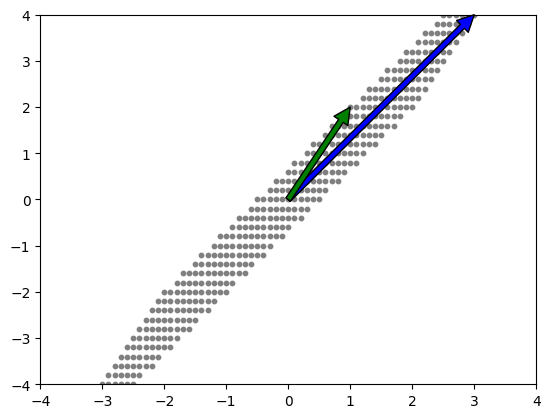

In [ ]:
#e_1,e_2の現在地.

INI = np.array([[1,3],[2,4]])
Y = mapping(INI,X_ini)
make_graph(Y,axlim = 4)

##Case1: Scalar

まずは先ほどと同じく，自分自身らを方や2倍，方や0.5倍にするような行列を考えてみよう.


「行列は行き先！」なのだから素直に

$A=\begin{bmatrix}2&1.5\\4&2\end{bmatrix}$

が良さげに見えるが，**いざ代入してみると全く違う方向に飛んでいく．**
定義通り，
$Ax_1=2x_1$,$Ax_2=0.5x_2$を満たすAを計算してみると

$A=\begin{bmatrix}-5/2&9/4\\-6&5\end{bmatrix}$

が適当とわかる


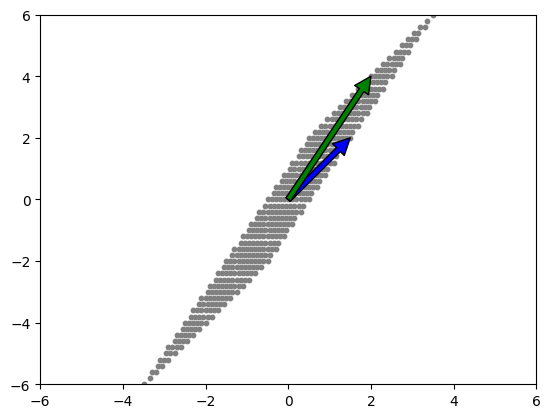

A= [[-2.5   2.25]
 [-6.    5.  ]]


In [ ]:
A = np.array([[-5/2,9/4],[-6,5]])
Y = mapping(A@INI ,X_ini)
make_graph(Y,axlim = 6)
print("A=",A)

##Case2: Rotate and Composite

次に回転と合成を利用して，このアダムとイブを

$x_1,x_2$のように$\begin{bmatrix}2\\0\end{bmatrix}, \begin{bmatrix}0\\0.5\end{bmatrix}$へと移動させてみる．

「行列は行き先！」なのだから素直に

$A=\begin{bmatrix}2&0\\0&0.5\end{bmatrix}$

が良さげに見えるが，**いざ代入してみると全く違う方向に飛んでいく．**

定義通り，
$Ae_1=2x_1$,$Ae_2=0.5x_2$を満たすAを計算してみると
どんなゲートを通ればいいか少して計算してみると


$A=\begin{bmatrix}-4&3\\0.5&-0.25\end{bmatrix}$

が適当とわかる


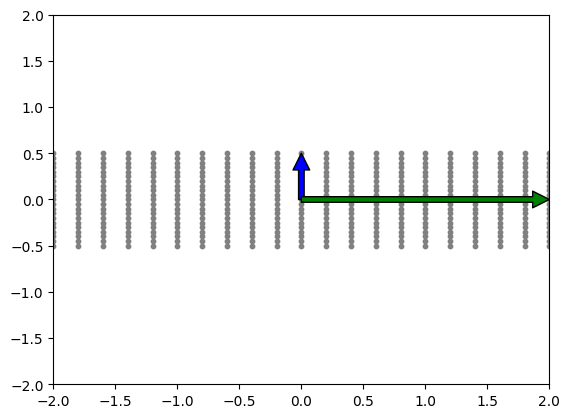

A= [[-4.    3.  ]
 [ 0.5  -0.25]]


In [ ]:
A = np.array([[-4,3],[0.5,-0.25]])
Y = mapping(A@INI,X_ini)
make_graph(Y,axlim = 2)

print("A=",A)

「え，話とちゃうやん！行列って行き先じゃないの！？」と思ったそこのあなた．良い疑問．

実は，行列はただしくは，**「"基底が"行き先にたどり着くための地図（Map)」**なのです．

なので当然現在地の異なる$e_1,e_2$と$x_1,x_2$では，同じ行き先でも，ゲートの表示が違ってきます．




$x_1$くん,$x_2$ちゃんは$[1,0],[0,1]$という綺麗なペアだったから，行き先がそのまま行列に現れてたということ．








##Case3: Change Basis

なるほど，行列とは正確には，「(アダムとイブの姿に依存して)ぶっ飛ばした先の住所を書いてるだけ」ということか...

ふむ...では基底(アダムとイブ)を変えた時に行列をすぐに書き換えられるように少し練習してみよう．

目的地を$d_1=\begin{bmatrix}-1/2\\3/4\end{bmatrix}, d_2=\begin{bmatrix}-5/6\\7/8\end{bmatrix}$に設定してみよう．





### **基底がx_1,x_2の場合**

これは単純に基底が綺麗ために行き先と行列の表示が一致するので

$A=\begin{bmatrix}-1/2&-5/6\\3/4&7/8\end{bmatrix}$

が適当



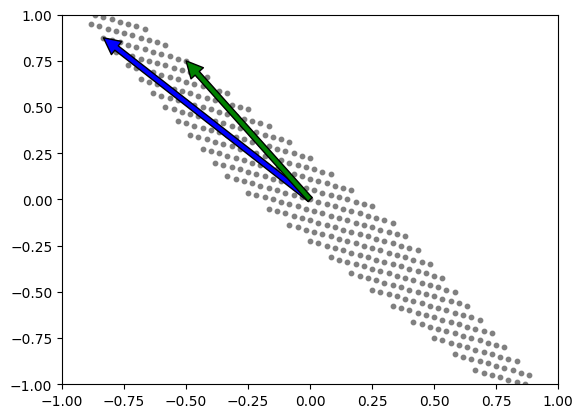

A= [[-0.5        -0.83333333]
 [ 0.75        0.875     ]]


In [ ]:
A = np.array([[-1/2,-5/6],[3/4,7/8]])
Y = mapping(A ,X_ini)
make_graph(Y,axlim = 1)
print("A=",A)

### **基底がe_1,e_2の場合**

なんかこの基底でのマップ考えるの面倒そうやなあ．．．．

けどよく考えてみて．$x_1,x_2$の姿になりさえすれば話は簡単やった．

せや，発想を転換させて「$e_1,e_2$はそもそも$x_1,x_2$がある行列でぶっ飛ばされた姿」と捉えてみよ．

そんな行列は間違いなく
$P=\begin{bmatrix}1&3\\2&4\end{bmatrix}$
で，つまりはこのゲートを逆に通って$x_1,x_2$の姿になったあとに，簡単なゲートを通れば

それこそが目的地に着くための地図の表示や！




$A=\begin{bmatrix}-1/2&-5/6\\3/4&7/8\end{bmatrix}P^{-1}$



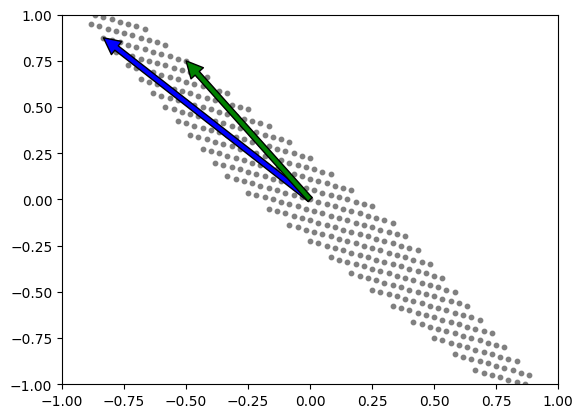

A= [[ 0.16666667 -0.33333333]
 [-0.625       0.6875    ]]


In [ ]:
P=np.array([[1,3],[2,4]])
P_inv=np.linalg.inv(P)
A = np.array([[-1/2,-5/6],[3/4,7/8]])@P_inv
Y = mapping(A@INI ,X_ini)
make_graph(Y,axlim = 1)
print("A=",A)

(逆に，基底が$x_1$,$x_2$みたいに綺麗じゃないときに行列の行き先を知りたいなら，$AP$とすれば形が見えるということ)

# 第3章 Determinant
ゲートの順行を調べるのに便利な値

##Essence: 行列式は飛ばされた時の拡大率

ゲートは異世界への扉．その扉に飛ばされた時，自分たちがどんなふうになるのか知りたい．大きくなるの？小さくなるの？それとも死ぬの？

そんな疑問は行列のある値を確かめれば晴れる．

それが行列式

$\det{A}, |A|$

これは超単純に，基底たちが作る面積の飛ばされた後の拡大率





##Case1: Same sized
基底を$x_1$,$x_2$として

$A=\begin{bmatrix}2&0\\0&0.5\end{bmatrix}$

の場合，二人はそれぞれ，$Ax_1=\begin{bmatrix}2\\0\end{bmatrix}, Ax_2=\begin{bmatrix}0\\0.5\end{bmatrix}$に移動するので，面積は2*0.5=1, 面積は等倍！！！！
！


In [ ]:
A = np.array([[2,0],[0,0.5]])

detA=np.linalg.det(A)

print("detA=",detA)

detA= 1.0


今度は基底を$e_1$,$e_2$として，同じく自分自身らをを方や2倍，方や0.5倍にするような行列

$A=\begin{bmatrix}-5/2&9/4\\-6&5\end{bmatrix}$


当然これも，面積としては2*0.5=1なので....たとえ基底が違って行列の表示が違えど...


In [ ]:
A = np.array([[-5/2,9/4],[-6,5]])

detA=np.linalg.det(A)

print("detA=",detA) #面積拡大率は一緒！！！！！！！


detA= 1.0000000000000018


##Case2: Shrink and Expand

基底が$x_1,x_2$を基底として目的地$d_1,d_2$へのゲート


$A=\begin{bmatrix}-1/2&-5/6\\3/4&7/8\end{bmatrix}$

をくぐると.....



In [ ]:
A = np.array([[-1/2,-5/6],[3/4,7/8]])
detA=np.linalg.det(A)

print("detA=",detA) #縮む！！！！！！！！！！！！！！！！！！！！！！！！！！

detA= 0.18750000000000008


基底が$e_1,e_2$の時は,元々の大きさがまあまああるので，

$A=\begin{bmatrix}-1/2&-5/6\\3/4&7/8\end{bmatrix}P^{-1}$


というマップで目的地について拡大率を見てみると



In [ ]:
P=np.array([[1,3],[2,4]])
P_inv=np.linalg.inv(P)
A = np.array([[-1/2,-5/6],[3/4,7/8]])@P_inv
detA=np.linalg.det(A)

print("detA=",detA) #クソ縮む！！！！！！！！！！！！P^-1での縮小からさらにAでの縮小もかけてるから当たり前か！！！！！！

detA= -0.09375000000000003


（つまり$\det{AB}=\det{A}\det{B}$なんて当たり前すぎる）

##Case3: Collapse

行列は必ずしも異世界へ両通行ゲートではなく，通ったら帰れないやつもあった

$B=\begin{bmatrix}1&0.5\\2&1\end{bmatrix}$  

例えばこれは通ると一本の線の世界に押し込められてしまう

当然，今まで面積だった物は線になってしまうので.......

In [ ]:
B = np.array([[1,0.5],[2,1]])

detB=np.linalg.det(B)

print("detB=",detB) #拡大率は0！！！！！！面積ではなくなってしまうため！！！！！！！！！！！！！！！！！

detB= 0.0


##Case4: Undefinable

行列式がそもそも定義できないこともある．それは次元を移すようなゲートの時．
例えば
$A=\begin{bmatrix}-1/2&-5/6\\3/4&7/8\\9/10&11/12\end{bmatrix}$

だと，($x_1,x_2$が基底として)見たまんま

$Ax_1=\begin{bmatrix}-1/2\\3/4\\9/10\end{bmatrix}, Ax_2=\begin{bmatrix}-5/6\\7/8\\11/12\end{bmatrix}$

の三次元に移動するわけだけど，(detは移った先での拡大率だから)，体積の拡大率を定義できない．次元を落とす場合も然り．



**つまり非正方行列に対しては拡大率=行列式を定義できない**

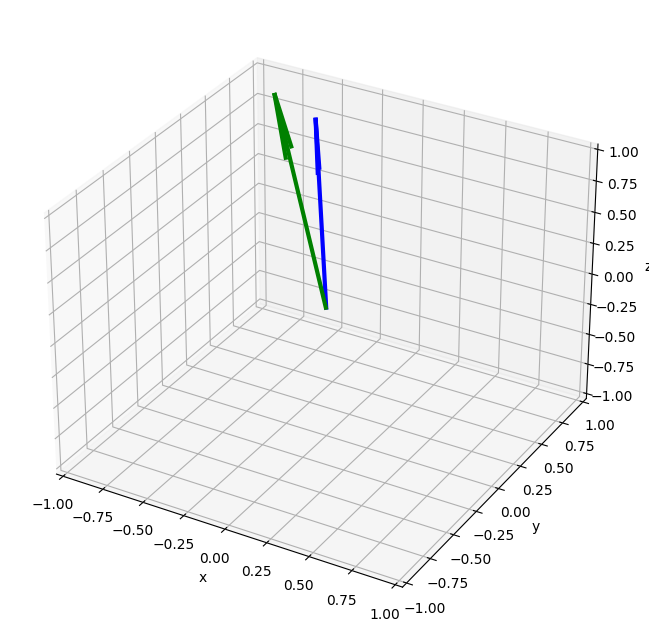

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


o = np.array([[0], [0],[0]])
x_1= np.array([[1],[0]])
x_2= np.array([[0],[1]])
A = np.array([[-1/2,-5/6],[3/4,7/8],[9/10,11/12]])



vector = [(o, A@x_1, 'b'), (o, A@x_2, 'g' ) ]
fig = plt.figure(figsize=(8, 8)) # 図の設定
ax = fig.add_subplot(projection='3d')
for tail, head, color in vector:
    ax.quiver(*tail,*head,
               color=color,   linewidth=3)
ax.set_xlabel('x') # x軸ラベル
ax.set_ylabel('y') # y軸ラベル
ax.set_zlabel('z') # z軸ラベル

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.show()

##Tips: 計算では軸が重要

Essenceではないけど行列式を計算する上で，自明で役に立つ性質を紹介


### 負の拡大率は鏡像を示す
行列は軸を入れ替えると鏡像に飛ばすことになる．(飛ばされた後の面積が，以前と鏡像の関係になる)
この時の拡大率を負と捉えておく．

$A=\begin{bmatrix}0&2\\0.5&0\end{bmatrix}$






In [ ]:
A = np.array([[0,2],[0.5,0]])

detA=np.linalg.det(A)

print("detA=",detA)

detA= -1.0


### 軸方向に何か足されても拡大率は同じ


例えば三角形の面積を求めるとき，上の２辺が動いたって底辺から頂点への高さが変わらなければ面積は同じ

それと同じで行列も，ある軸方向に関係ない軸が足されても，拡大率は不変

$A=\begin{bmatrix}0+2&2\\0.5+0&0\end{bmatrix}$



In [ ]:
A = np.array([[2,2],[0.5,0]])

detA=np.linalg.det(A)

print("detA=",detA) #変わってないでしょう

detA= -1.0



逆に，軸自身の変化の影響はダイレクトに受ける

$A=\begin{bmatrix}0&2*5\\0.5&0*5\end{bmatrix}$


In [ ]:
A = np.array([[0,10],[0.5,0]])

detA=np.linalg.det(A)

print("detA=",detA) #軸の5倍がそのままダイレクトに適用されてるでしょう

detA= -5.000000000000001


### 掃き出し法
以上二つの性質を使って，行列式を対角成分だけの表示にすると，面積の拡大率が一目瞭然（成分の積）だよねってのを"掃き出し法"と呼ぶ．

# 第4章 Kernel and Image

ゲートを逆に通ってみる話


##Essence: カーネルは潰れる部分, イメージは移動した後の世界



さて，主人公を変えましょう．あなたはとあるm次元の世界の住人です．ある日，散歩していると泣いている子$y$がいました．

どうやらワケのわからないゲートAを通ってここにきてしまい，元のn次元世界での姿$x$に戻りたいそうです

$y=Ax$



##Case1: Regular


出会ったのが，
$\begin{bmatrix}9\\9\\2\end{bmatrix}=\begin{bmatrix}2&3&3\\3&4&2\\-2&-2&3\end{bmatrix}x$のようなケース．



まず通ってきたゲートについて調べると，


*   見たところ3次元から3次元へ飛ばすゲート...しかも拡大率$\det{A}\neq 0$なので



うむ...!!!このゲートは逆行できる...!!!(正則行列)






In [ ]:
A = np.array([[2,3,3],[3,4,2],[-2,-2,3]])
A_inv=np.linalg.inv(A)
y=np.array([[9],[9],[2]])
x=A_inv@y

print("x=",x) #元の姿に戻れてよかったねyちゃん

x= [[ 3.]
 [-1.]
 [ 2.]]


##Case2: Singular (Fat)


出会ったのが，
$\begin{bmatrix}9\\2\end{bmatrix}=\begin{bmatrix}2&3&3\\3&4&2\end{bmatrix}x$のようなケース．



同じく通ってきたゲートについて調べると，


*   見たところ3次元から2次元に飛ばすゲート, つまりdetを計算するまでもなく，


情報が欠けてしまっていて元の人物が特定できないので，このゲートは逆行できない！


************
具体的には，

$x=\begin{bmatrix}x\\y\\z\end{bmatrix}$と置いて

$2x+3y+3z=9$  
$3x+4y+2z=2$を解くと

$x=6z-30$  

$y=-5z+23$

この関係を満たす限り$z$は何でもいいことがわかる．つまり

ゲートを通る前の3次元空間に漂う$x=6z-30, y=-5z+23$という(超)直線上にいる点は誰でもゲートを通ると$[9,2]$に飛ぶ.  

この世界に来てしまった時点で$y$ちゃんのzの情報を定めることができない！




In [ ]:
A = np.array([[2,3,3],[3,4,2]])
x_a=np.array([[0],[-2],[5]]) #(超)直線上から全く異なる二人x_a, x_bを取ってくる
x_b=np.array([[-30],[23],[0]])





print("Ax_a=",A@x_a) #x_aがゲートを通った姿
print("Ax_b=",A@x_b) #x_bがゲートを通った姿

Ax_a= [[9]
 [2]]
Ax_b= [[9]
 [2]]




**このようにゲートによって定義される，潰されてしまう世界の部分のことを「ゲートのkernel」という．**  



##Case3: Singular (Tall)


出会ったのが，
$\begin{bmatrix}9\\9\\2\end{bmatrix}=\begin{bmatrix}2&3\\3&4\\-2&-2\end{bmatrix}x$のようなケース．


同じく通ってきたゲートについて調べると，


*   見たところ2次元から3次元に飛ばすゲート．detを定義するまでもなく


情報が増えてしまっていて$y$がそもそも本当にゲートを通ってやってきた人物ではないかもしれないので，このゲートは逆行できない！
**************

具体的には，

$x=\begin{bmatrix}x\\y\end{bmatrix}$と置いて

$2x+3y=9$  
$3x+4y=9$  
$-2x-2y=2$を解くと...(二式ずつ)

$x=-9,y=9$  
$x=-13,y=12$  
$x=-12,y=11$


けど実際に代入してみるとどれも[9,9,2]には飛ばない．

つまりそもそも$y=$[9,9,2]が$x$ちゃんが飛ばされた姿ではない(ゲートを通って来たわけではない)．$y$ちゃんはずっとこの世界の住人で，ただの妄想に取り憑かれたやべーやつ









In [ ]:
A = np.array([[2,3],[3,4],[-2,-2]])
x_a=np.array([[-9],[9]]) #どの二式を解くかで違う解が出る
x_b=np.array([[-13],[12]])
x_c=np.array([[-12],[11]])



print("Ax_a=",A@x_a) #そしてどれも[9,9,2]は満たさない
print("Ax_b=",A@x_b)
print("Ax_c=",A@x_c)

Ax_a= [[9]
 [9]
 [0]]
Ax_b= [[10]
 [ 9]
 [ 2]]
Ax_c= [[9]
 [8]
 [2]]


**このようにゲートによって定義される，飛ばされた後の世界のことを「ゲートのImage」という．**  





##Case4: Singular (Square)




$\begin{bmatrix}9\\9\\2\end{bmatrix}=\begin{bmatrix}2&3&6\\3&4&8\\-2&-2&-4\end{bmatrix}x$のようなケース



まず通ってきたゲートについて調べると，


*   見たところ3次元から3次元へ飛ばすゲート. いや，しかし！拡大率$\det{A}= 0$


よく見てみると行き先が２本のベクトルしかないな．

**つまりゲートによって3次元空間の世界のうち，ある超直線は点につぶれて(Kernelは1次直線),全体として世界は超平面に移動する(Imageは2次平面)!** このゲートは逆行できない！

**********
具体的には，

$x=\begin{bmatrix}x\\y\\z\end{bmatrix}$と置いて

$2x+3y+6z=9$  
$3x+4y+8z=9$  
$-2x-2y-4z=2$を解くと


$x=-11,y+2z=11$

これを満たす限りは[9,9,2]に移動する．


...と思いきや代入してみると[11,11,0]に飛ぶ．この直線は[11,11,0]に潰れるカーネルだった．

つまり[9,9,2]はImageの上でない．そもそも出会った$y$ちゃんはxの世界からゲートを通って来たわけではなかった．ずっとこの世界の住人で，ただの妄想に取り憑かれたやべーやつ














In [ ]:
A = np.array([[2,3,6],[3,4,8],[-2,-2,-4]])
x_a=np.array([[-11],[-11],[11]]) #解いたものに合う人を選んでも
x_b=np.array([[-11],[5],[3]])




print("Ax_a=",A@x_a) #どれも[9,9,2]には飛ばない
print("Ax_b=",A@x_b)


Ax_a= [[11]
 [11]
 [ 0]]
Ax_b= [[11]
 [11]
 [ 0]]


**このように，ゲートの順行は単純でも，逆行は奥が深い．**  



*   出会った人物が，「ゲートを通る過程で情報が欠けてしまっている」，「あるいは虚言癖持ちでそもそもゲートを通ってきた人物ではない」可能性もあるからだ
*   逆行は, 「情報が欠けない移動で(Kernel = 0$\leftrightarrow$Image = n)」, かつ「出会う人が必ず本当にゲートを通ってやってきた(n = m)」の時のみ成立する.












# 第5章 Rank
ゲートの逆行を調べるのに便利な値

##Essence: ランクは移動した後の世界の次元



逆行を調べるとき，行列式だけでは心許ないと感じただろうか．
「$\det{A}=0$で逆行可能, $\det{A}\neq0$で逆行不可」という2パターンしかないからだ.  (まあdetは順行を調べる値だし当然)  


そこで逆行を調べるのに適した値を導入する!それがランクだ!
と言っても，ただのイメージの次元(dim)

$\mathrm{rank}A= \dim \mathrm{Image}A=元の\mathrm{n}次元-\dim \mathrm{Kernel}A$


これさえわかれば，逆行の可否，Image, Kernelの次元と言った逆行を見るのに必要な値が全てわかる



##Case1: Regular


さっきの
$\begin{bmatrix}9\\9\\2\end{bmatrix}=\begin{bmatrix}2&3&3\\3&4&2\\-2&-2&3\end{bmatrix}x$のようなケース．



ランクついて調べると，


*   $\mathrm{rank}A=3$.つまり本当に3次元から3次元へ飛ばすゲート.



つまり出会う全ての人はゲートを通って同じ次元から移動してきたとわかる．[9,9,2]は逆行できる！





In [ ]:
A = np.array([[2,3,3],[3,4,2],[-2,-2,3]])
rankA=np.linalg.matrix_rank(A)

print("rankA=", rankA)

rankA= 3


##Case2: Singular (Fat)


さっきの，
$\begin{bmatrix}9\\2\end{bmatrix}=\begin{bmatrix}2&3&3\\3&4&2\end{bmatrix}x$のようなケース．



ランクを調べると，


*   $\mathrm{rank}A=2$. つまり本当に3次元から2次元へ飛ばすゲート.



てことはKernelは1次元の超直線で，ある直線の上にいるやつはみんな[9,2]の一点に潰れてしまうので，このゲートは逆行できない！


In [ ]:
A = np.array([[2,3,3],[3,4,2]])
rankA=np.linalg.matrix_rank(A)

print("rankA=", rankA)

rankA= 2


##Case3: Singular (Tall)


さっきの
$\begin{bmatrix}9\\9\\2\end{bmatrix}=\begin{bmatrix}2&3\\3&4\\-2&-2\end{bmatrix}x$のようなケース．


ランクを調べると，


*   $\mathrm{rank}A=2$. つまり実際は2次元から2次元(超平面)へ飛ばすゲート.


[9,9,2]は超平面のImage上にはいないので，そもそもゲートを通ってきた人物ではない！逆行できない！


In [ ]:
A = np.array([[2,3],[3,4],[-2,-2]])
rankA=np.linalg.matrix_rank(A)

print("rankA=", rankA)

rankA= 2


##Case4: Singular (Square)




$\begin{bmatrix}9\\9\\2\end{bmatrix}=\begin{bmatrix}2&3&6\\3&4&8\\-2&-2&-4\end{bmatrix}x$のようなケース



ランクを調べると，


*   $\mathrm{rank}A=2$. つまり実際は3次元から2次元(超平面)へ飛ばすゲート.





Kernelは1次元の超直線で，ある直線の上にいるやつはみんなある一点に潰れてしまいImageのどこかに移動する．  

[9,9,2]は超平面のImage上にはいないので，そもそもゲートを通ってきた人物ではない！逆行できない！
ランクが落ちているのでたとえ[9,9,2]がImage上にいても逆行できない！



In [ ]:
A = np.array([[2,3,6],[3,4,8],[-2,-2,-4]])
rankA=np.linalg.matrix_rank(A)

print("rankA=", rankA)

rankA= 2


**まとめ**：




*   「Rankは落ちるか保つかしかしない「．「出会った人はImageの上にいるか居ないかしかない」，
*   その４通りの組み合わせの中で逆行可能なのは「Rank保ち(Kernel = 0$\leftrightarrow$Image = n), 出会った人がImageの上」

これを厳密にして，出会った人が**"必ず"**逆行できるための条件は

Kernel = 0$\leftrightarrow$Image = nかつ **n=m**となる．







##Tips: 計算では式の本数に着目

KernelとImageをちゃんと理解してたら自明すぎる性質と計算法を紹介

### ランクは元の空間以上にデカくはならん

$m \times n$があったとき$\mathrm{rank}A \leq m, \mathrm{rank}A \leq n$



ゲートを通って元の世界の次元より大きくなることはないし,ましてや通った後の世界よりも次元が大きくなることもない
***********

練習  

$A=\begin{bmatrix}2&3&6\\3&4&8\\-2&-2&-4\end{bmatrix}$

これは見た感じ$3 \times 3$やけど実際は3次元から2次元の超平面への移動(RankA =2)

$B=\begin{bmatrix}1&11&12\\8&7&6\\2&3&5\\4&10&9\end{bmatrix}$

これは見た感じ$3 \times 4$やけど実際は3次元から3次元のへ超空間への移動でしかない(Rank B =3)

In [ ]:
A = np.array([[2,3,6],[3,4,8],[-2,-2,-4]])
rankA=np.linalg.matrix_rank(A)

print("rankA=", rankA) # rankA =< 3


B = np.array([[1,11,12],[8,7,6],[2,3,5],[4,10,9]])
rankB=np.linalg.matrix_rank(B)

print("rankB=", rankB) # rankA =< 4


rankA= 2
rankB= 3


### もっと一般化すると...

$\mathrm{rank}BA \leq \mathrm{rank}B, \mathrm{rank}BA \leq \mathrm{rank}A$
である.  

要は写像はランクが「落ちるか or 保つか」しかできないってこと.


*******


例えばさっきの$A,B$を用いると$BA$いうゲートについて，まず世界はAを通ることで2次元超平面に移動する(Kernelは点に潰れる).
世界はさらにBを通ることで3 $\to $4次元空間に移動すると思いきやただの超空間に移動するだけなので, Imageは超空間の中にある超平面,つまり2次元




In [ ]:
BA=B@A
rankBA=np.linalg.matrix_rank(BA)

print("rankBA=", rankBA)


rankBA= 2


### 吐き出し法


ランクってのはつまりはダブってない式の数．それを調べたいなら，吐き出し法を使って対角が非ゼロになるよう変形して(というか変数を減らしていって)，有意な式が何段あるか数えればいい．

#応用編 Least SQ/ Tikhonov

順行の話(第1〜3章)はわかったと思うので，逆行の話(第4〜5章)の確かめ/応用．

***********


逆行する時，嫌だったことを2つ思い出してみよう


*   **ゲートによって一部の世界が潰れる**  
出会ったyは何かしらが潰れた先で, 元のxは無数に候補がある.(Kernelが少なくとも1次元以上.)  



*   **出会ったyがそもそもゲートを通ってきた人物ではない**  
出会ったyはそもそもImageの上になく, 元のxは存在しない.



## レンズは繊細



**「そんなゲート現実に存在するの〜〜〜〜〜？」**

あるんです．その好例がカメラ.

本来，たくさんの光源$x_1, x_2 \cdots x_n$に対して, レンズという写像(ゲート)を通して, たくさんのセンサー$y_1, y_2 \cdots y_n$が反応し，ゲートの逆を計算して元の姿を画面に移す．


**理想：**
$\begin{bmatrix}y_1\\y_2\\\cdots y_n\end{bmatrix}=\begin{bmatrix}1&0&\cdots 0\\0&1&\cdots0\\0&0&\cdots1\end{bmatrix}\begin{bmatrix}x_1\\x_2\\\cdots x_n\end{bmatrix}$

でも実際はピントやノイズのせいで


**世界の一部が潰れて**候補が絞れなくなるか
$\begin{bmatrix}y_1\\y_2\\\cdots y_n\end{bmatrix}=\begin{bmatrix}0.25&0.25&\cdots 0.4\\0.1&0.1&\cdots0.01\\0.5&0.5&\cdots1\end{bmatrix}\begin{bmatrix}x_1\\x_2\\\cdots x_n\end{bmatrix}$





**出会ったyがそもそもゲートを通ってきた人物ではなくなる**







## 妥当な予想をする

**こんな時，本当の姿xは予想できないのか?**


いやいや，こう仮定してみる．

*   **潰れる前の姿は比較的,自然な姿：**$\|x\|^2は小さい$
*   **出会ったyは比較的,似ている：**$\|y-Ax\|^2は小さい$


などの指標を使って$x$を予想すればいい．






### Least SQ


$J=\|y-Ax\|^2$という指標の場合.これを最小化する$x$の最も妥当な姿は(微分=0より)

$\hat{x}=(A^\top A)^{-1}A^\top y$

これを**最小二乗法**という．

In [ ]:

A = np.array([[2,3],[3,4],[-2,-2]]) #2次元から3次元にある超平面へ送るゲート
y=np.array([[9],[9],[2]])


invAA=np.linalg.inv(A.T@A)
x_guess=invAA@A.T@y

print("x_guess=", x_guess)
print("Ax_guess=", A@x_guess) #yとの差が一番小さい

x_guess= [[-12.11111111]
 [ 11.22222222]]
Ax_guess= [[9.44444444]
 [8.55555556]
 [1.77777778]]


### Tikhonov

ただ上の場合，$A^\top A$もsingularの時，計算できない．そこで，Kernelにいる時の$x$の不自然さも最小化するべき量として考えてやると

$J=\|y-Ax\|^2+\alpha\|x\|^2$という指標が考えられる．これを最小化する$x$の最も妥当な姿は

$\hat{x}=(A^\top A+\alpha I)^{-1}A^\top y$

($I$が入るので必ず正則になる．$\alpha$は自然さをどれくらい重視するかの重み.)  

これを**チコノフの正則化**という．

In [ ]:
A = np.array([[2,3,6],[3,4,8],[-2,-2,-4]]) #Singular
a=0.00001
I=np.eye(3)
y=np.array([[9],[9],[2]])


invAA_I=np.linalg.inv(A.T@A+a*I)
x_guess=invAA_I@A.T@y

print("x_guess=", x_guess)
print("Ax_guess=", A@x_guess) #yとの差が一番小さく，xとして比較的自然な大きさのもの

x_guess= [[-12.11066602]
 [  2.24437676]
 [  4.48875352]]
Ax_guess= [[9.44431934]
 [8.55553711]
 [1.77756445]]


## 逆行の本質

今のLeast SQやTikhonovを見て思ったかもしれない．「え，非正方行列も逆行列っぽいのできるくね？」

その通り．逆行の本質は




*   「Rank保ち(Kernel = 0$\leftrightarrow$Image = n),」
*    「出会った人がImageの上」

なのだから，高次への非正方($n < m)$ では，逆行列的なことができ得る．



***********

実際にさっきのでやってみよう

非正方行列  

$A=\begin{bmatrix}2&3\\3&4\\-2&-2\end{bmatrix}$
をゲートとし，観測点yが$\begin{bmatrix}5\\7\\-4\end{bmatrix}$とする．この逆行列は存在するか？


脳死で「非正方だから無理！」ってのは浅はか．



*   dim Kernel =0$\leftrightarrow$Rank=2なので「ランクが保たれてる」

*   $[5,7,-4]^\top$はゲートを通る前の$[1,0]^\top+[0,1]^\top$の移り先なので「Imageの上に観測点yが乗ってる」


この時，Least SQやTikhonovで逆行列を定義できていることになる．

In [ ]:
A = np.array([[2,3],[3,4],[-2,-2]]) #Singular
a=0.000001
I=np.eye(2)
y=np.array([[5],[7],[-4]]) #イメージの上


invAA_I=np.linalg.inv(A.T@A+a*I)
x_guess=invAA_I@A.T@y

print("inverse=",invAA_I@A.T) #これが非正方向け逆行列
print("x_guess=", x_guess) #実際に逆行してみる
print("Ax_guess=", A@x_guess) #逆行してからまた順行して見る

inverse= [[-0.88888412 -0.11111021 -1.55554783]
 [ 0.77777414  0.22222153  1.11110521]]
x_guess= [[0.99999922]
 [1.00000056]]
Ax_guess= [[ 5.00000011]
 [ 6.99999989]
 [-3.99999956]]


# 第6章 Eigen Vector and Value

ゲートの順行についての話その２．逆行の性質を活用するよ



##Essence: 固有ベクトルとはゲートでスカラー倍にしかならない基底



さて話を戻して，順行の話をもう一度するのだが，実はもうすでに固有ベクトル/固有値というワードについての全てを知っている．



*   第1章：行列とは目的地の表示だった．
*   第2章：正確には，基底が目的地に行くためのマップ(手順)だった．

そのため，"ただ基底をスカラー倍するゲート"でさえも，基底によって見た目が異なるんだった．
*****


基底：$x_1=\begin{bmatrix}1\\0\end{bmatrix}, x_2=\begin{bmatrix}0\\1\end{bmatrix}$の時，

2倍と1/2倍するゲート：$A_X=\begin{bmatrix}2&0\\0&0.5\end{bmatrix}$


$\quad$

基底：$e_1=\begin{bmatrix}1\\2\end{bmatrix}, e_2=\begin{bmatrix}3\\4\end{bmatrix}$
の時，

2倍と1/2倍するゲート：$A_E=\begin{bmatrix}-5/2&9/4\\-6&5\end{bmatrix}$
****

**この基底とスカラー値のペアのことを固有ベクトル/固有値と呼んでいるだけ**








## Case1: Non Zero


固有ベクトル$x_1,x_2$をゲート$A_X$に通すと固有値倍に動くことがわかる．

$\begin{bmatrix}2&0\\0&0.5\end{bmatrix}x_1=2x_1, \begin{bmatrix}2&0\\0&0.5\end{bmatrix}x_2=1/2x_2$




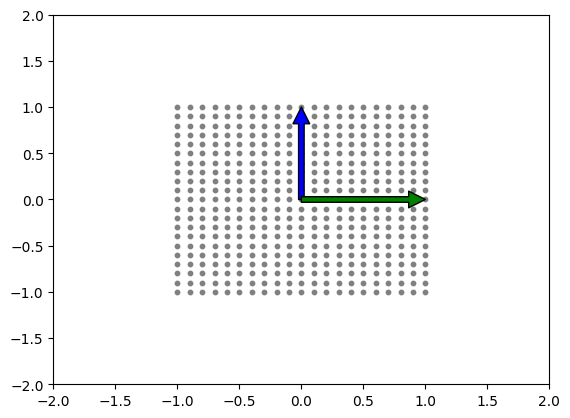

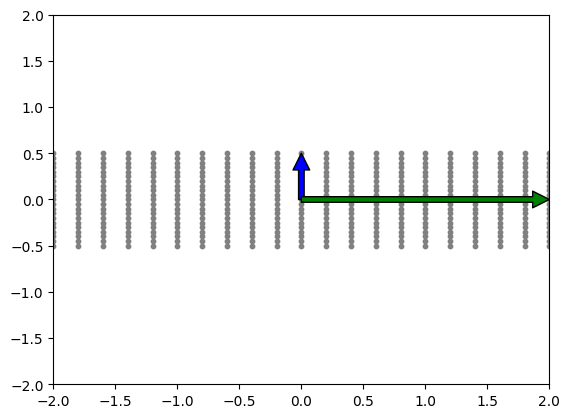

Eigens= [2.  0.5]


In [ ]:
I=np.eye(2)  #ゲートを通らない
Y = mapping(I,X_ini)
make_graph(Y,axlim = 2)

A = np.array([[2,0],[0,0.5]]) #ゲートを通る
Y = mapping(A,X_ini)
make_graph(Y,axlim = 2)
Eigens=np.linalg.eig(A)[0]
print("Eigens=",Eigens)


また，こちらも固有ベクトル$e_1,e_2$をゲート$A_E$に通すと固有値倍に動くことがわかる．
$\begin{bmatrix}-5/2&9/4\\-6&5\end{bmatrix}e_1=2e_1, \begin{bmatrix}-5/2&9/4\\-6&5\end{bmatrix}e_2=1/2e_2$

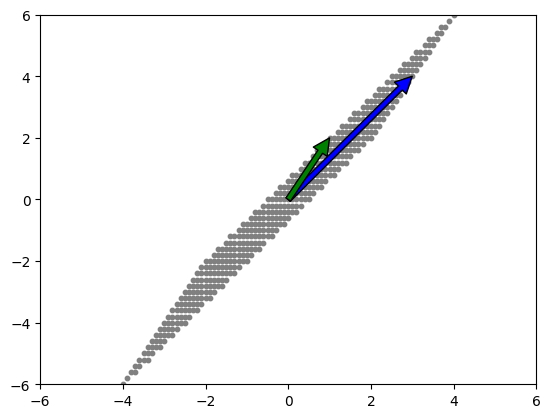

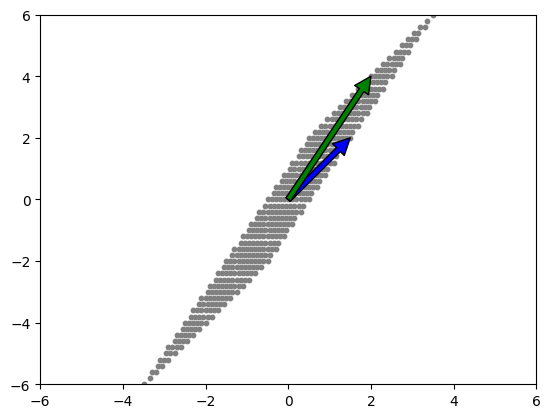

Eigens= [0.5 2. ]


In [ ]:
INI = np.array([[1,3],[2,4]])
I=np.eye(2)  #ゲートを通らない
Y = mapping(INI ,X_ini)
make_graph(Y,axlim = 6)

INI = np.array([[1,3],[2,4]])
A = np.array([[-5/2,9/4],[-6,5]]) #ゲートを通る
Y = mapping(A@INI ,X_ini)
make_graph(Y,axlim = 6)
Eigens=np.linalg.eig(A)[0]
print("Eigens=",Eigens)

つまり固有ベクトル/固有値とは，「Aに固有にスカラー倍のみされるベクトル」のことである．当然，逆行$A^{-1}$の固有ベクトルも同じであり，その固有値は$1/\lambda$

## Case2: Zero

固有値が0なときってことはつまり，固有ベクトルがゲートを通ると0倍されるってこと．つまりは，



*   固有値に0を含むと
*   =ある固有ベクトルが消える
*   =次元が潰れる=ランクが落ちる  

$\to$このゲートは逆行できない,逆行列が存在しない．



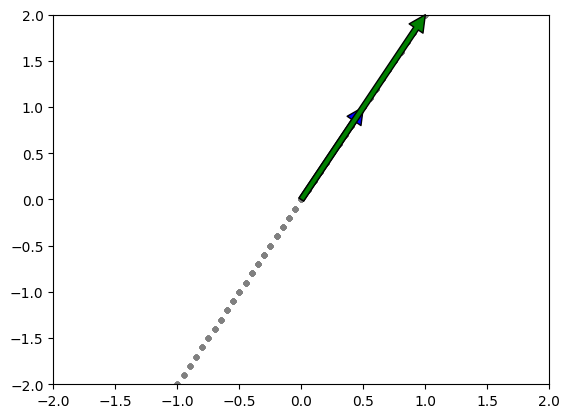

Eigens= [2.00000000e+00 2.22044605e-16]


In [ ]:
B = np.array([[1,0.5],[2,1]])
Y = mapping(B,X_ini)
make_graph(Y,axlim = 2)
Eigens=np.linalg.eig(B)[0]
print("Eigens=",Eigens)

似た話で，

*   固有値に0を含まずnこ全ての値が異なる
*   $\to$固有ベクトルがnこだけある
*   =次元が潰れない=ランクは保つ  

=このゲートは逆行できる,逆行列が存在する

(この逆，つまり「逆行列が存在する$\to$n全ての値が異なる」は言えない．だって同じようにスカラー倍される固有ベクトルたちがありうるから）



## Case3: Eigen equation

今までは「基底があり」「それを固有値倍だけするゲート」を調べてきた．けど現実には，逆に「ゲートだけ渡されたが，固有ベクトルと固有値は知りません」というケースもたくさんある．  
そんな時には固有方程式が役に立つ．仕組みは簡単．

*********
固有ベクトル$x$,固有値$\lambda$として定義より  
$Ax=\lambda x$  

移項して
$(A-\lambda I)x=0$.  

固有ベクトルは０ベクトルではないので，「通ったベクトルを０に潰すようなゲート$(A-\lambda I) \to$ゲートの拡大率$\det{(A-\lambda I)} =0$」  

この$\det{(A-\lambda I)} =0$を固有方程式という．解くと$\lambda$がわかり，代入すると$x$がわかる．手計算は滅多にしないのでほぼ使わん．



## Case4: Diagonalization

今まで述べた話を使って，**”対角化”**という便利なことができる．それは行列を対角成分のみの表示にする操作．これの嬉しい点は沢山あるけれど，ざっくりというと**"世界の基底を, ゲートに適した基底に変換することで, 基底の挙動が一目瞭然になる"**

**********
例えば今，世界の基底が綺麗な$x_1,x_2$とする．そこであるゲート$A$を通った先を見たい．エッセンスより「行列はぶっ飛ばした先！」なので行き先が読める．何回ゲートを通ってももちろん行き先が読める．  
けどそれは，あっちこっち動くき回るベクトルを目で追っているということでもあり，毎回の計算が面倒．


**「もしゲートを通っても，基底が動かず，せめてスカラー倍に動くだけなら，ゲートを何回通っても基底がどうなるか一目瞭然なのになぁ...」**
*********

ではそうしましょう．
現在の基底$x_1,x_2$に対して，ゲートに固有のベクトル$p_1,p_2$,固有の値$\lambda$を考える.

まず基底を固有ベクトルに取り替える: $P$

そして好きなだけ$A$を通る:$A^nP$

最後に元の奇麗な基底に戻すと今までの旅路がただのスカラー倍だったことが見える:$P^{-1}A^nP=\Lambda^n$

(よって世界が好きなだけ$A$を通った先: $A^n =P\Lambda^n P^{-1}$)

In [ ]:
A=np.array([[5,3],[1,6]]) #あるゲート
lambdas, P=np.linalg.eig(A) #そのゲートについての固有値と固有ベクトル行列をゲット
LAMBDA=np.diag(lambdas) #固有値の対角行列を作成
P_inv=np.linalg.inv(P) #固有ベクトル行列を逆転させておく

print("P_inv@A@P=",P_inv@A@P) #基底を取り替えて，ゲート潜って, 基底を戻す=固有値の対角行列
print("LAMBDA=",LAMBDA)
print("A^2=",A@A)#累乗の計算もお手のもの
print("P@LAMBDA^2@P_inv=",P@LAMBDA**2@P_inv)

P_inv@A@P= [[ 3.69722436e+00 -4.44089210e-16]
 [-4.44089210e-16  7.30277564e+00]]
LAMBDA= [[3.69722436 0.        ]
 [0.         7.30277564]]
A^2= [[28 33]
 [11 39]]
P@LAMBDA^2@P_inv= [[28. 33.]
 [11. 39.]]


## Case5: Jordans's standard form

「いつでもゲートに関して固有ベクトル/固有値が存在するのか」と言われればそうじゃない．例えば  

$A=\begin{bmatrix}5&4\\-1&1\end{bmatrix}$

はRank=2(=飛ばした先の次元)となっていて，逆行可能なゲートだけど，固有ベクトル/固有値は一組しかない($\lambda=3$の[-2,1]^T)


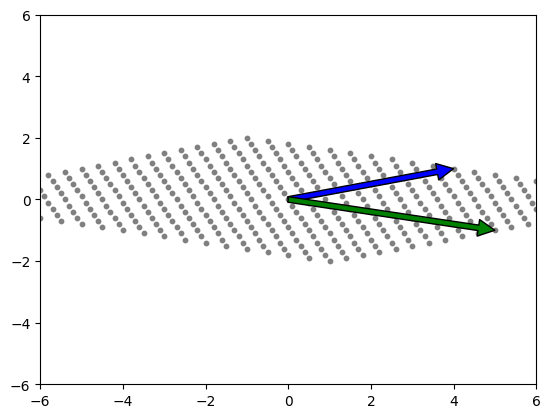

Eigen Value= [3.+2.98023224e-08j 3.-2.98023224e-08j]
Eigen Vector= [[ 0.89442719+0.00000000e+00j  0.89442719-0.00000000e+00j]
 [-0.4472136 +6.66400187e-09j -0.4472136 -6.66400187e-09j]]


In [ ]:
A=np.array([[5,4],[-1,1]])
Y = mapping(A ,X_ini)
make_graph(Y,axlim = 6)
EigenValue=np.linalg.eig(A)[0] #3しかない
print("Eigen Value=",EigenValue)
EigenVector=np.linalg.eig(A)[1] #[-2,1]^T しかない
print("Eigen Vector=",EigenVector)

このように正則行列だとしても**固有値が被っていると十分な数の固有ベクトルを持たないことがあり**，ゲートをくぐると必ずみんな何かしら回転するかもしれない．

**「じゃあ，対角化は実はそんなに実用的ではない？」**

いや，対角化はできなくとも，一般に，正方行列は対角化に似た標準形への変形ができることが知られている．**それが「ジョルダンの標準形」だ．**

***********

と言っても仕組みは簡単. 対角化の「ゲートでスカラー倍されるやつだけを基底に採用する」という厳しい条件を**「ゲートでスカラー倍されて＋固有ベクトルで表現されるやつも基底に採用する」**という条件に緩める




*   1本目 $Ap_1=\lambda p_1$  
$\begin{bmatrix}5&4\\-1&1\end{bmatrix}\begin{bmatrix}-2\\1\end{bmatrix}=3\begin{bmatrix}-2\\1\end{bmatrix}$

*   2本目 $Ap_2=\lambda p_2 + p_1$  
$\begin{bmatrix}5&4\\-1&1\end{bmatrix}\begin{bmatrix}1\\-1\end{bmatrix}=3\begin{bmatrix}1\\-1\end{bmatrix}+\begin{bmatrix}-2\\1\end{bmatrix}$

********


するとどうなるかって，基底を取り替えた世界ではゲートによって
「p1はスカラー倍移動」,「p2はスカラー倍移動してp1との和に移動」に見える   

$P^{-1}AP=\begin{bmatrix}3&1\\0&3\end{bmatrix}$

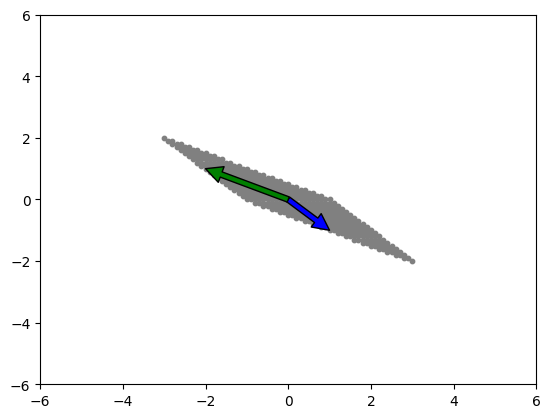

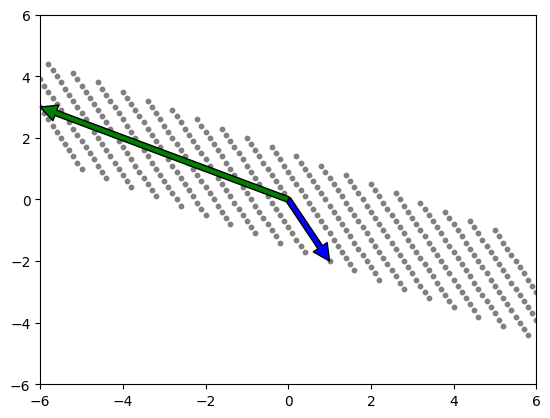

In [ ]:
INI = np.array([[-2,1],[1,-1]])
Y = mapping(INI ,X_ini) #基底がゲートを通る前
make_graph(Y,axlim = 6)


INI = np.array([[-2,1],[1,-1]])
A=np.array([[5,4],[-1,1]]) #基底がゲートを通る
Y = mapping(A@INI ,X_ini)
make_graph(Y,axlim = 6)


1本目の固有ベクトルはスカラー倍されるだけで，2本目は一般化固有ベクトルで，スカラー倍と和になってることに着目．


(つまりは，行列を固有の基底で対角化することは，行列の表示を基底のスカラー/足し算のみで表すことになる)

(穿った見方をすれば，どんな行列も[1,0][0,1]で対角化された状態と言えるため，行列は常に常にその基底のスカラー/足し算のみの表示とも言える)

In [ ]:

A=np.array([[5,4],[-1,1]])
p_1=np.array([[-2],[1]])
print(A@p_1, 3*p_1)
p_2=np.array([[1],[-1]])

print(A@p_2, 3*p_2+p_1)




[[-6]
 [ 3]] [[-6]
 [ 3]]
[[ 1]
 [-2]] [[ 1]
 [-2]]
